#1. Importando bibliotecas


In [ ]:
!pip install backtrader
!pip install yfinance


     |████████████████████████████████| 410 kB 12.1 MB/s 
     |████████████████████████████████| 6.4 MB 15.4 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import pandas as pd
import backtrader as bt
import datetime
import yfinance as yf
import matplotlib.pyplot as plt

#2. Compreendendo o conceito de classes

In [ ]:
#Construindo classes

#Marca, Memoria, Placa de Video
#o init é o consultor e permite criar a funcionalidade primária da classe
#o self serve para que você acesse as propriedades de uma instancia
#propriedades: marca, modelo, cor
class Carro:
  def __init__(self):
    self.marca = 'Mercedes'
    self.modelo='C180'
    self.cor='Vermelho'
     
pass 

computador1 = Carro()
print(computador1.marca)





Mercedes


In [ ]:
#Criando classes dinamicas

#propriedades dinamicas
class Carro:
  def __init__(self, marca, modelo, cor):
    self.marca = marca
    self.modelo= modelo
    self.cor = cor
     
pass 

carro1 = Carro('BMW', '320i', 'azul')
print(carro1.marca, carro1.modelo, carro1.cor)


BMW 320i azul


In [ ]:
#Criando Métodos

#propriedades dinamicas
class Carro:
  def __init__(self, marca, modelo, cor):
    self.marca = marca
    self.modelo= modelo
    self.cor = cor
  def Ligar(self):
    print('estou ligando')
  def Desligar(self):
    print('estou desligando')
  def ExibirInfoCarro(self):
    print(self.marca, self.modelo, self.cor)



In [ ]:
carro1 = Carro('Volvo', 'XC60', 'Vinho')
carro1.Ligar()
carro1.Desligar()
carro1.ExibirInfoCarro()

estou ligando
estou desligando
Volvo XC60 Vinho


In [ ]:
#1 Criação da Estratégia
class Estrategia(bt.Strategy):
    def next(self):
        pass 

#2 Inicializando o Cerebro
cerebro = bt.Cerebro()

#3 Adicionar a estrategia
cerebro.addstrategy(Estrategia)

#4 Rodar a estrategia
cerebro.run()

[]

#4. Buscando dados no YFinance

In [ ]:
#Escolher o ativo e o período para backtestar
#segredo é passar o yfinance dentro da função datafeeds 

data = bt.feeds.PandasData(dataname=yf.download('BTC-USD', '2017-01-01', '2021-07-01', auto_adjust=True))


[*********************100%***********************]  1 of 1 completed


In [ ]:
#Trazer a estratégia 
class PrintFechamento(bt.Strategy):

  def __init__(self):
    #criei uma variavel dataclose e deixa como referencia a linha final [0] da serie de dados
    self.dataclose = self.datas[0].close
    #criando uma função de logging para capturar a data do ultimo datapoint da minha base de dados
  def log(self, txt, dt=None):
    dt = dt or self.datas[0].datetime.date(0)
    print(f'{dt.isoformat()} {txt}') #Print data and close
    #defino o next - ele será executado toda vez que o bt chamar uma linha do db
  def next(self):
    self.log('Close, %.2f' % self.dataclose[0])

In [ ]:
#inicializando cerebro
cerebro = bt.Cerebro()

#adicionando dados para backtesting
cerebro.adddata(data)

#adicionando a estrategia ao cerebro
cerebro.addstrategy(PrintFechamento)

#executando
cerebro.run()

2017-01-01 Close, 998.33
2017-01-02 Close, 1021.75
2017-01-03 Close, 1043.84
2017-01-04 Close, 1154.73
2017-01-05 Close, 1013.38
2017-01-06 Close, 902.20
2017-01-07 Close, 908.59
2017-01-08 Close, 911.20
2017-01-09 Close, 902.83
2017-01-10 Close, 907.68
2017-01-11 Close, 777.76
2017-01-12 Close, 804.83
2017-01-13 Close, 823.98
2017-01-14 Close, 818.41
2017-01-15 Close, 821.80
2017-01-16 Close, 831.53
2017-01-17 Close, 907.94
2017-01-18 Close, 886.62
2017-01-19 Close, 899.07
2017-01-20 Close, 895.03
2017-01-21 Close, 921.79
2017-01-22 Close, 924.67
2017-01-23 Close, 921.01
2017-01-24 Close, 892.69
2017-01-25 Close, 901.54
2017-01-26 Close, 917.59
2017-01-27 Close, 919.75
2017-01-28 Close, 921.59
2017-01-29 Close, 919.50
2017-01-30 Close, 920.38
2017-01-31 Close, 970.40
2017-02-01 Close, 989.02
2017-02-02 Close, 1011.80
2017-02-03 Close, 1029.91
2017-02-04 Close, 1042.90
2017-02-05 Close, 1027.34
2017-02-06 Close, 1038.15
2017-02-07 Close, 1061.35
2017-02-08 Close, 1063.07
2017-02-09 Clo

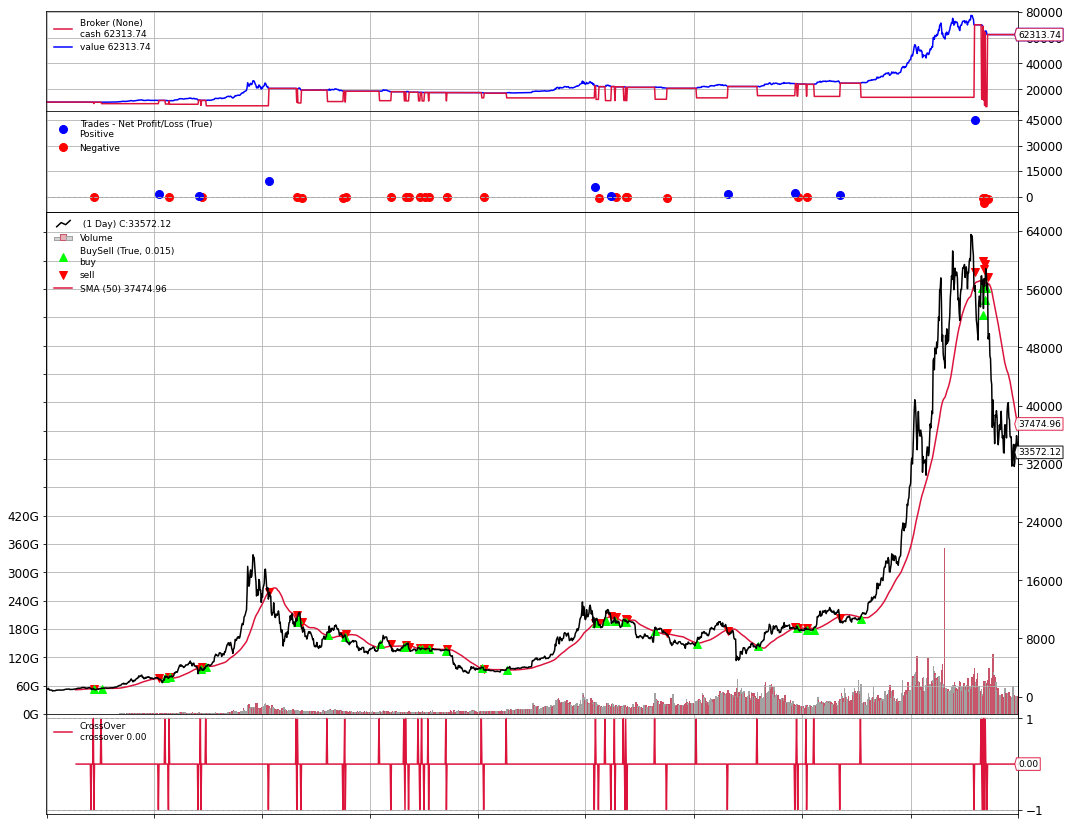

[[<Figure size 1080x864 with 5 Axes>]]

In [ ]:
from backtrader.indicators import crossover

#para fazer o matplotlib rodar

%matplotlib inline 

#Teste 2

class MMACruzamento(bt.SignalStrategy):
  def __init__(self): #cria uma função que roda imediatamente quando um objeto é criado a partir dessa classe
    sma = bt.ind.SMA(period=50) #aqui você define o indicador
    price = self.data #aqui é apontador do indicador
    crossover = bt.ind.CrossOver(price,sma) #aqui é onde você define o sinal, aqui no caso é sinal de cruzamento
    self.signal_add(bt.SIGNAL_LONG, crossover) 

cerebro = bt.Cerebro()
cerebro.addstrategy(MMACruzamento)
cerebro.adddata(data)
cerebro.run()
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams.update({'font.size': 12}) 
cerebro.plot(iplot = False)


In [ ]:
#Estratégia 2 - RSI

class RSI(bt.SignalStrategy):
  def __init__(self): #cria uma função que roda imediatamente quando um objeto é criado a partir dessa classe
    self.rsi = bt.ind.RSI(safehigh=70.0, safelow=30.0) #aqui você define o indicador
  def next(self):
    if not self.position:
      if self.rsi < 30:
          self.buy(size=1)
    else:
      if self.rsi > 70:
          self.sell(size=1)

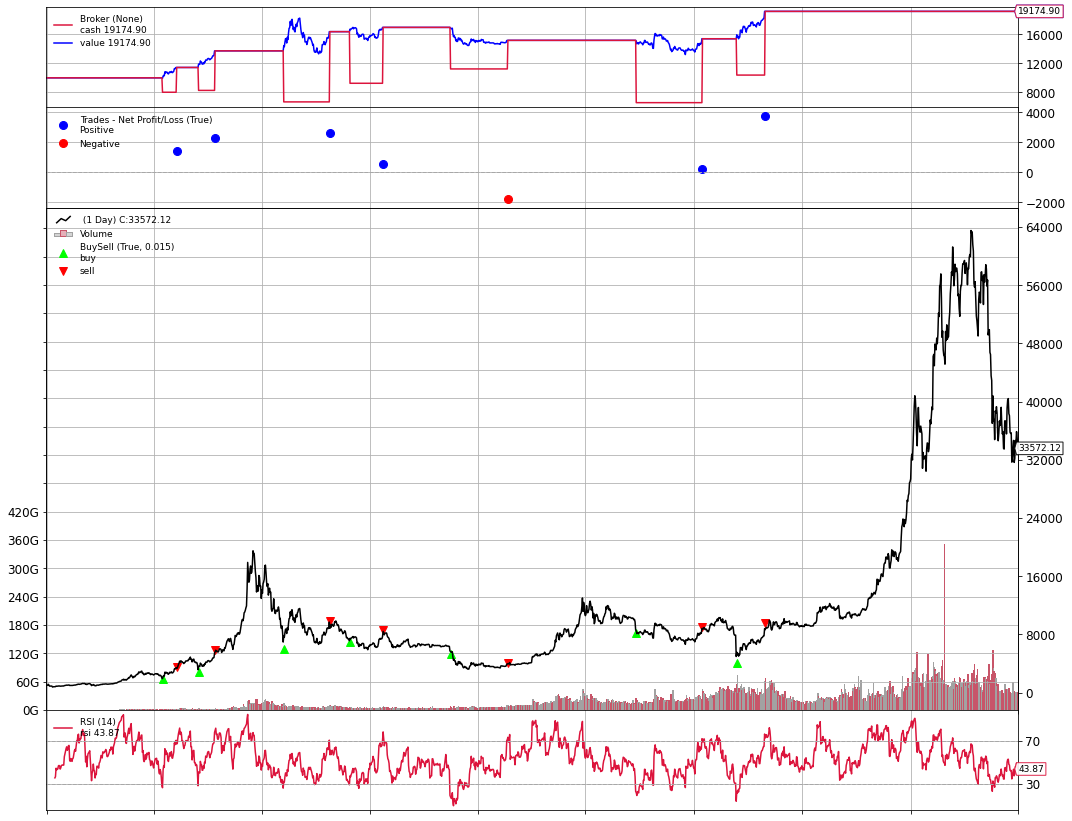

[[<Figure size 1080x864 with 5 Axes>]]

In [ ]:
#Executando estrategia 2

cerebro = bt.Cerebro()
cerebro.addstrategy(RSI)
cerebro.adddata(data)
#cerebro.addsizer(bt.sizers.SizerFix, stake=10)#fazer a compra de 10 ações   
cerebro.run()
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams.update({'font.size': 12}) 
cerebro.plot(iplot = False)

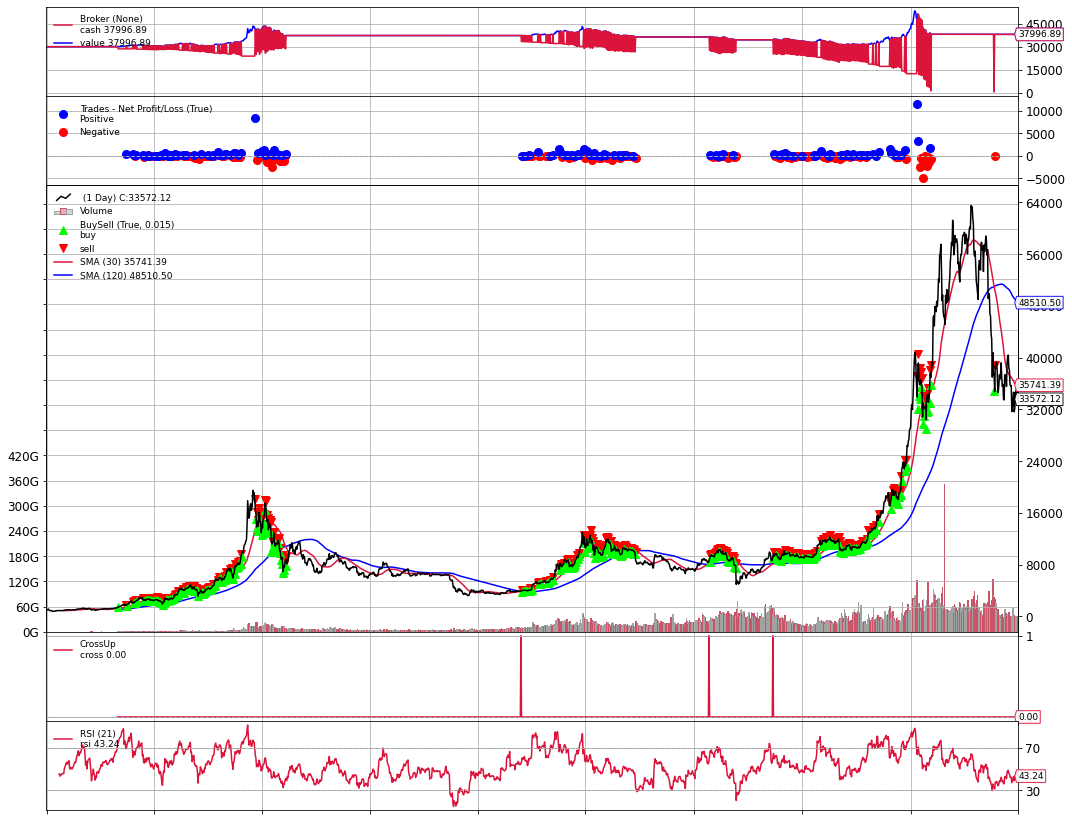

[[<Figure size 1080x864 with 6 Axes>]]

In [ ]:
#Estratégia 3

#Primeiro estruturar os indicadores que queremos na estratégia

class rsi_media_movel(bt.Strategy):

  def __init__(self):

    self.rsi = bt.indicators.RSI(self.data.close, period=21)
    self.mm_rapida = bt.indicators.SMA(self.data.close, period=30)
    self.mm_lenta = bt.indicators.SMA(self.data.close, period=120)
    self.crossup = bt.ind.CrossUp(self.mm_rapida, self.mm_lenta)




  def next(self):
    if not self.position: #se não tiver alguma ordem aberta - condição de compra
      if self.rsi > 30 and self.mm_rapida > self.mm_lenta:
        self.buy(size=1)

    else: #caso a ordem já estiver aberta - condição de venda
      if self.rsi < 70:
        self.sell(size=1)
  
caixa_inicial = 30000 #definimos o montante a inicial do portfólio

cerebro = bt.Cerebro()
cerebro.addstrategy(rsi_media_movel)
cerebro.adddata(data)
cerebro.broker.setcommission(commission=0.003) #setamos a comissão da exchange
cerebro.broker.setcash(caixa_inicial)
cerebro.run()
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams.update({'font.size': 12}) 
cerebro.plot(iplot = False)


%matplotlib inline

#Criar a estratégia Cruzmento de média móvel simples

class MMSCruzamento(bt.SignalStrategy):
  def __init__(self):
    mms = bt.ind.SMA(period=50)
    preco = self.data
    cruzamento = bt.ind.CrossOver(preco,mms)
    self.signal_add(bt.SIGNAL_LONG, cruzamento)

cerebro = bt.Cerebro()
cerebro.addstrategy(MMSCruzamento)
cerebro.adddata(data)
cerebro.run()
plt.rcParams['figure.figsize'] = [10,7]
plt.rcParams.update({'font.size': 12})
cerebro.plot(iplot=False)

















In [ ]:
#Signals
"valor_estrategia = cerebro.broker.getvalue()
"pnl = valor_estrategia - caixa inicial

"print('Valor Final Estratégia: ${}'.format(valor_estrategia))
"print('P/L: ${}'.format(pnl))

In [ ]:
#Analyzers

#Primeiro estruturar os indicadores que queremos na estratégia

import backtrader as bt
import backtrader.analyzers as btanalyzers
import backtrader.strategies as btstrats

from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

class rsi_media_movel(bt.Strategy):

  def __init__(self):

    self.rsi = bt.indicators.RSI(self.data.close, period=21)
    self.mm_rapida = bt.indicators.EMA(self.data.close, period=28)
    self.mm_lenta = bt.indicators.EMA(self.data.close, period=140)
    self.crossup = bt.ind.CrossUp(self.mm_rapida, self.mm_lenta)




  def next(self):
    if not self.position: #se não tiver alguma ordem aberta - condição de compra
      if self.rsi > 30 and self.mm_rapida > self.mm_lenta:
        self.buy(size=100)

    else: #caso a ordem já estiver aberta - condição de venda
      if self.rsi < 70:
        self.sell(size=100)
  
caixa_inicial = 30000

cerebro = bt.Cerebro()
cerebro.addstrategy(rsi_media_movel)
cerebro.adddata(data)
cerebro.broker.setcommission(commission=0.003)
cerebro.broker.setcash(caixa_inicial)
cerebro.run()
cerebro.addanalyzer(btanalyzers.PeriodStats, _name='stats', timeframe=bt.TimeFrame.Days)

thestrats = cerebro.run()
thestrat = thestrats[0]

print('Stats:', thestrat.analyzers.stats.get_analysis())

Stats: OrderedDict([('average', -6.715579948469015e-05), ('stddev', 0.0008467901852242727), ('positive', 406), ('negative', 481), ('nochange', 231), ('best', 0.00518137966319876), ('worst', -0.006003238795738275)])


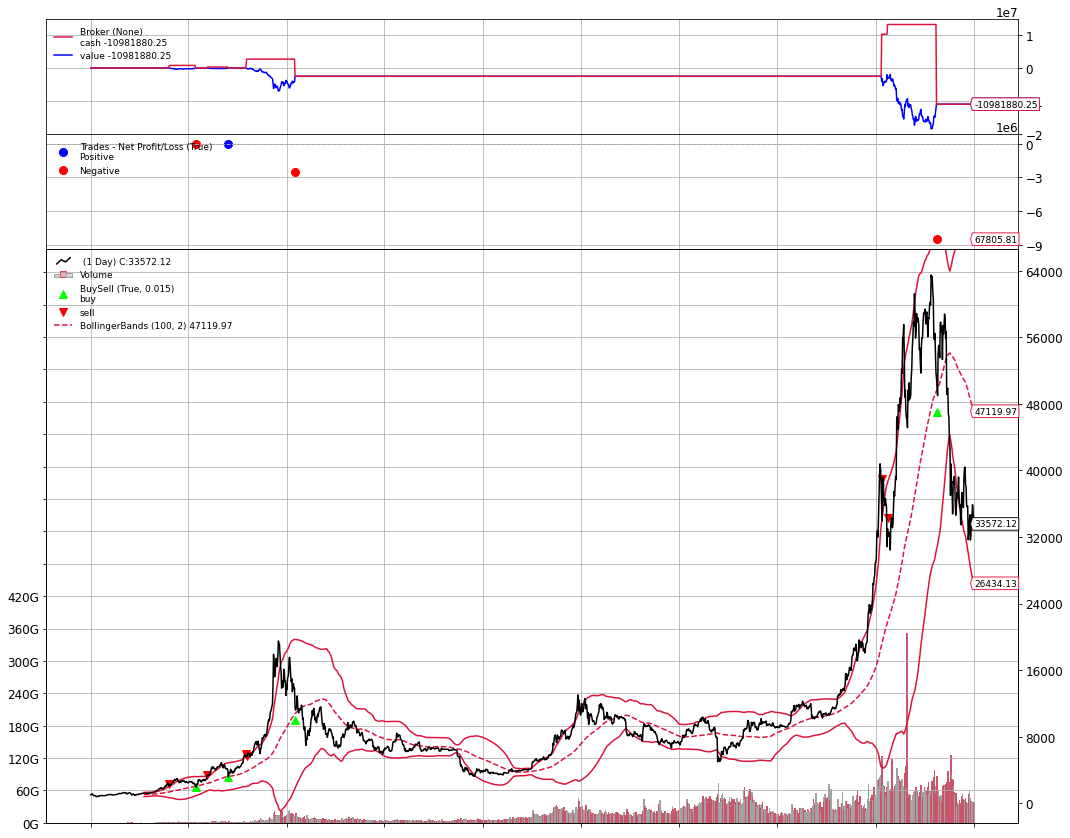

[[<Figure size 1080x864 with 4 Axes>]]

In [ ]:
#Estratégia 4 BB

#Primeiro estruturar os indicadores que queremos na estratégia



class BB(bt.Strategy):
  params = (
        ("period", 100),
        ("devfactor", 2),
        ("size", 100),
        ("debug", False)
        )

 
  def __init__(self):
    self.boll = bt.indicators.BollingerBands(period=self.p.period, devfactor=self.p.devfactor)




  def next(self):
    if not self.position: #se não tiver alguma ordem aberta - condição de compra
      if self.data.close > self.boll.lines.top:
        self.sell(exectype=bt.Order.Stop, price=self.boll.lines.top[0], size=self.p.size)
#caso a ordem já estiver aberta - condição de venda

      if self.data.close < self.boll.lines.bot:
        self.sell(exectype=bt.Order.Stop, price=self.boll.lines.top[0], size=self.p.size)
    else:
         
      if self.position.size > 0:
        self.sell(exectype=bt.Order.Limit, price=self.boll.lines.mid[0], size=self.p.size)
 
      else:
        self.buy(exectype=bt.Order.Limit, price=self.boll.lines.mid[0], size=self.p.size)


caixa_inicial = 30000 #definimos o montante a inicial do portfólio

cerebro = bt.Cerebro()
cerebro.addstrategy(BB)
cerebro.adddata(data)
cerebro.broker.setcommission(commission=0.003) #setamos a comissão da exchange
cerebro.broker.setcash(caixa_inicial)
cerebro.run()
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams.update({'font.size': 12}) 
cerebro.plot(iplot = False)


In [ ]:
#Estratégia 3

#Primeiro estruturar os indicadores que queremos na estratégia

class rsi_media_movel(bt.Strategy):

  def __init__(self):

    self.rsi = bt.indicators.RSI(self.data.close, period=21)
    self.mm_rapida = bt.indicators.SMA(self.data.close, period=30)
    self.mm_lenta = bt.indicators.SMA(self.data.close, period=120)
    self.crossup = bt.ind.CrossUp(self.mm_rapida, self.mm_lenta)




  def next(self):
    if not self.position: #se não tiver alguma ordem aberta - condição de compra
      if self.rsi > 30 and self.mm_rapida > self.mm_lenta:
        self.buy(size=1)

    else: #caso a ordem já estiver aberta - condição de venda
      if self.rsi < 70:
        self.sell(size=1)
  
caixa_inicial = 30000 #definimos o montante a inicial do portfólio

cerebro = bt.Cerebro()
cerebro.addstrategy(rsi_media_movel)
cerebro.adddata(data)
cerebro.broker.setcommission(commission=0.003) #setamos a comissão da exchange
cerebro.broker.setcash(caixa_inicial)
cerebro.run()
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams.update({'font.size': 12}) 
cerebro.plot(iplot = False)

